# **Project Name**    - Car Price Prediction with Machine Learning


# Problem Statement

Pricing a car accurately involves analyzing multiple variables, including the brand, technical specifications, fuel efficiency, and unique features. In the automotive market, estimating a car's price effectively is a key use case for machine learning. This project offers hands-on experience in building a predictive model for estimating car prices using data-driven methods.

### Key Objectives

- Understand the primary factors that influence how cars are priced.
- Design and train a machine learning model to estimate car prices.
- Strengthen your machine learning skillset by working on a real-world problem relevant to the automotive domain.


# Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import StandardScaler

# Import the different Models
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data Collection and processing


In [3]:
# loading the dataset to pandas DataFrame
car_dataset = pd.read_csv('https://raw.githubusercontent.com/utkarshranjan01/Car-Sales-Prediction/refs/heads/main/car_data.csv')

In [4]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_dataset.shape

(301, 9)

In [6]:
# statistical measures
car_dataset.describe() # it gives only for the columns with numerical values

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
# number of missing values in each column
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


We can see that there are no null values in the dataset.

In [8]:
car_dataset.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,object
Selling_type,object
Transmission,object
Owner,int64


In [9]:
car_dataset['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [10]:
car_dataset['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


In [11]:
car_dataset['Selling_type'].value_counts()

,count
Selling_type,
Dealer,195
Individual,106


## Dropping car names from the data used to train model

In [12]:
df = car_dataset.drop(['Car_Name'], axis=1)

In [13]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

## Converting the datatypes of different columns to float64 from object

In [14]:
# One-Hot Encoding for Fuel_Type and Selling_type
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type'], drop_first=True)

# Label Encoding for Transmission (manual=1, auto=0) as only two values
df['Transmission'] = df['Transmission'].map({'Manual': 1, 'Automatic': 0})

# Converting data types from int to float
df['Present_Price'] = df['Present_Price'].astype(float)
df['Driven_kms'] = df['Driven_kms'].astype(float)
df['Owner'] = df['Owner'].astype(float)
df['Transmission'] = df['Transmission'].astype(float)
df['Year'] = df['Year'].astype(float)
df['Selling_type_Individual'] = df['Selling_type_Individual'].astype(float)
df['Fuel_Type_Diesel'] = df['Fuel_Type_Diesel'].astype(float)
df['Fuel_Type_Petrol'] = df['Fuel_Type_Petrol'].astype(float)

In [15]:
df.dtypes

,0
Year,float64
Selling_Price,float64
Present_Price,float64
Driven_kms,float64
Transmission,float64
Owner,float64
Fuel_Type_Diesel,float64
Fuel_Type_Petrol,float64
Selling_type_Individual,float64


In [16]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Transmission,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual
0,2014.0,3.35,5.59,27000.0,1.0,0.0,0.0,1.0,0.0
1,2013.0,4.75,9.54,43000.0,1.0,0.0,1.0,0.0,0.0
2,2017.0,7.25,9.85,6900.0,1.0,0.0,0.0,1.0,0.0
3,2011.0,2.85,4.15,5200.0,1.0,0.0,0.0,1.0,0.0
4,2014.0,4.60,6.87,42450.0,1.0,0.0,1.0,0.0,0.0


## We can make a new column with car age and remove the year as car age would be a more useful metric

In [17]:
from datetime import datetime
current_year = datetime.now().year
current_year

2025

In [18]:
df['Car_Age'] = current_year - df['Year']

In [19]:
df.drop('Year', axis=1, inplace=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Transmission,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Car_Age
0,3.35,5.59,27000.0,1.0,0.0,0.0,1.0,0.0,11.0
1,4.75,9.54,43000.0,1.0,0.0,1.0,0.0,0.0,12.0
2,7.25,9.85,6900.0,1.0,0.0,0.0,1.0,0.0,8.0
3,2.85,4.15,5200.0,1.0,0.0,0.0,1.0,0.0,14.0
4,4.60,6.87,42450.0,1.0,0.0,1.0,0.0,0.0,11.0


In [21]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 2


In [22]:
df = df.drop_duplicates()

# What have we found out till now from the dataset
- We did not find any NaN values
- We found two duplicated rows which was removed
- Added a new column called car age which will count how old the car is
- We did mapping for some columns and one hot encoding for other
- Converted the datatypes of all columns to floating point numbers
- Removed the car name column as its not needed in model training

# Data Visualization with different charts

## 1. Top Selling Cars in the dataset

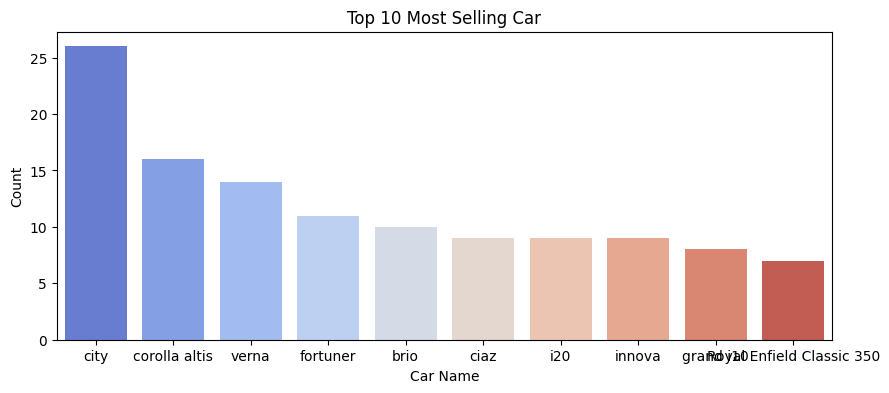

In [23]:
top_cars = car_dataset['Car_Name'].value_counts()[:10]

plt.figure(figsize=(10, 4))
sns.barplot(x=top_cars.index, y=top_cars.values, palette='coolwarm' )
# Set labels and title for the plot
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

# Display the plot
plt.show()

From the above chart, we can see that 'city' is the most selling car, followed by corolla altis, verna and fortuner.

## 2. Number of Cars Bought Each Year

<Figure size 800x500 with 0 Axes>

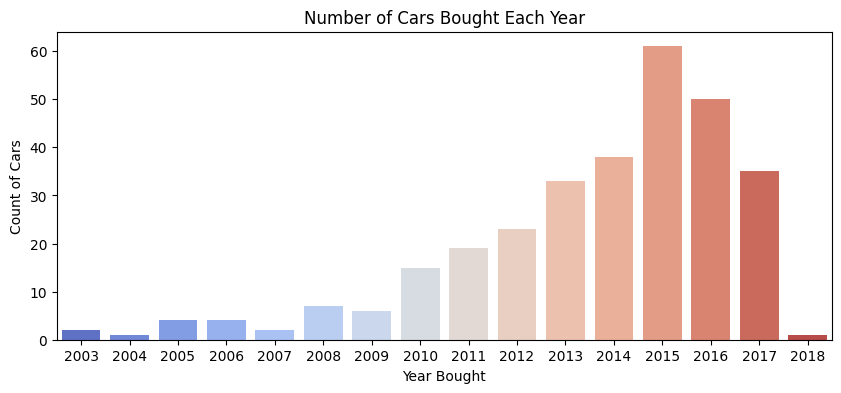

In [24]:
plt.figure(figsize=(8, 5))

plt.figure(figsize=(10, 4))
sns.countplot(x='Year', data = car_dataset, palette='coolwarm')

# Set labels and title for the plot
plt.xlabel('Year Bought')
plt.ylabel('Count of Cars')
plt.title('Number of Cars Bought Each Year')

plt.show()

We can see that in the year 2015 sold most cars followed by 2016, 2017 and 2014 and we can observe that it keeps increasing pretty consistently

## 3. Categorical Data Distribution Plots

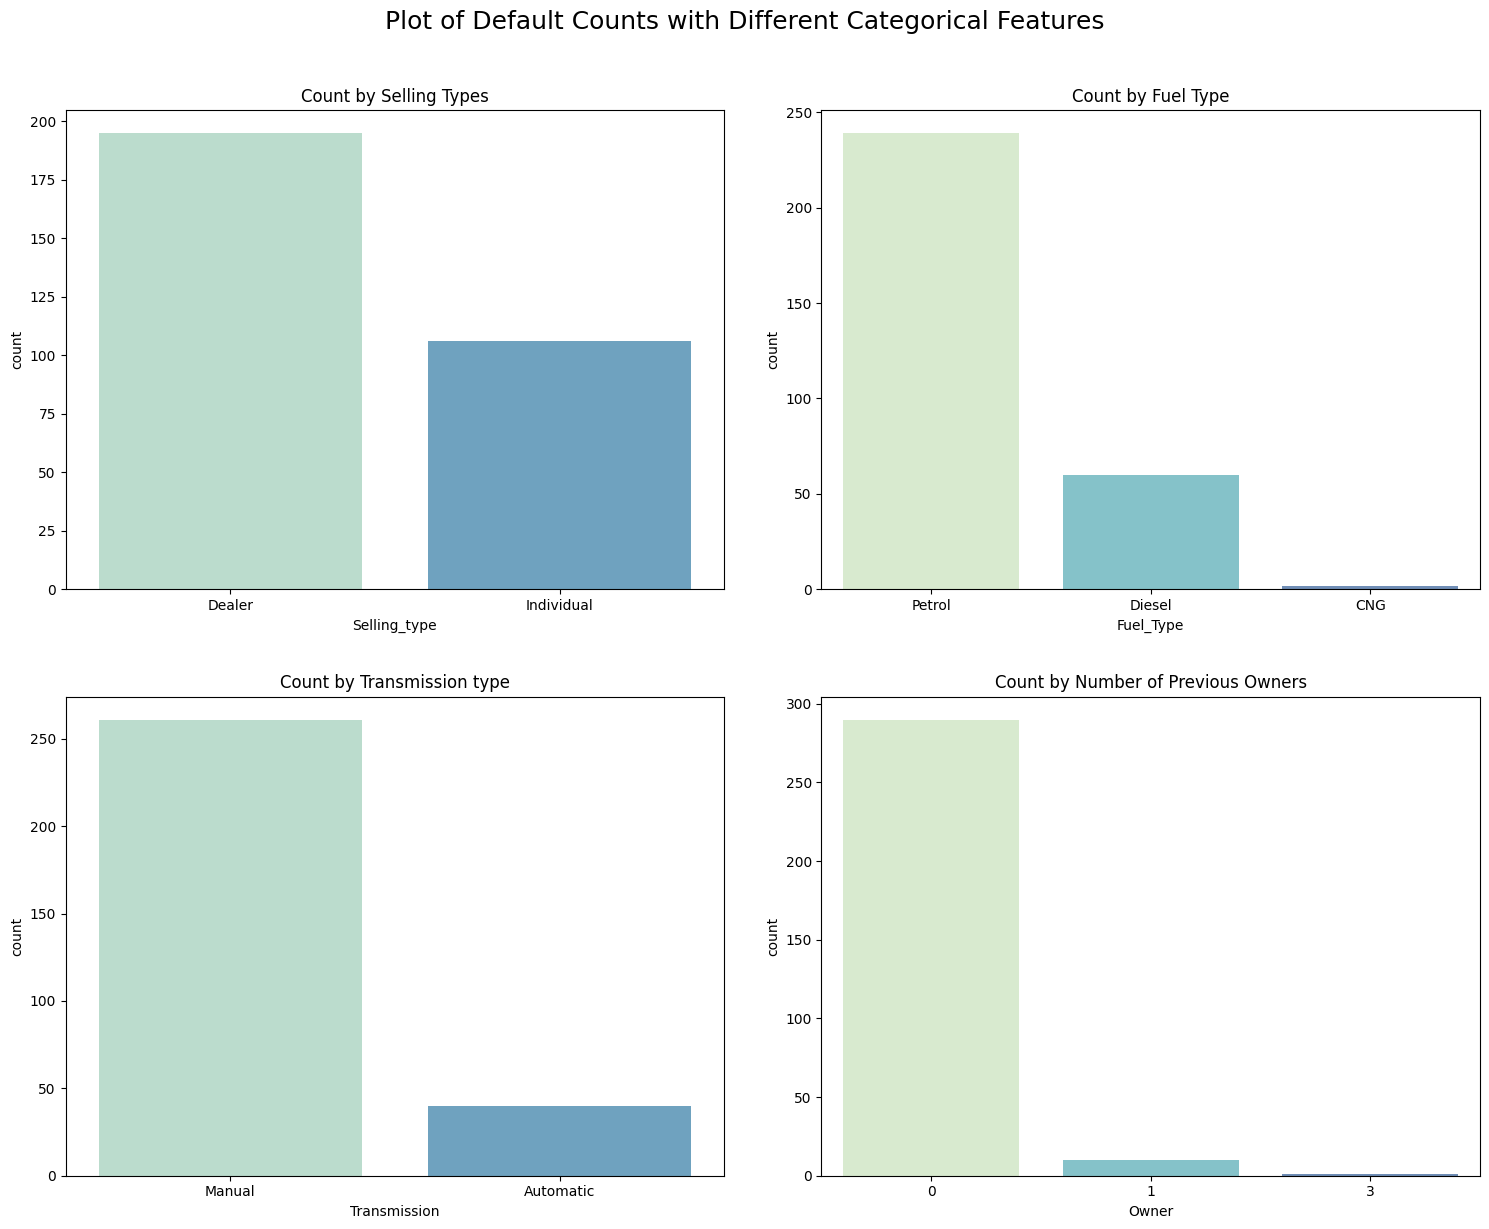

In [25]:
# Plotting the default counts with different categorical features

data = car_dataset
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Plot of Default Counts with Different Categorical Features', fontsize=18, y=1.02)

sns.countplot(x='Selling_type', data=data, palette='YlGnBu', alpha=0.7, ax=axes[0, 0])
axes[0,0].set_title('Count by Selling Types')

sns.countplot(x='Fuel_Type', data=data, palette='YlGnBu', alpha=0.7, ax=axes[0, 1])
axes[0,1].set_title('Count by Fuel Type')

sns.countplot(x='Transmission', data=data, palette='YlGnBu', alpha=0.7, ax=axes[1, 0])
axes[1,0].set_title('Count by Transmission type')

sns.countplot(x='Owner', data=data, palette='YlGnBu', alpha=0.7, ax=axes[1, 1])
axes[1,1].set_title('Count by Number of Previous Owners')

plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

We can see a lot of things that most cars sold are from dealers and most are petrol vehicles and most are manual vehicles and also most are new vechicles as they have no previous owners

## 4. Driving Kilometers vs the Selling Price

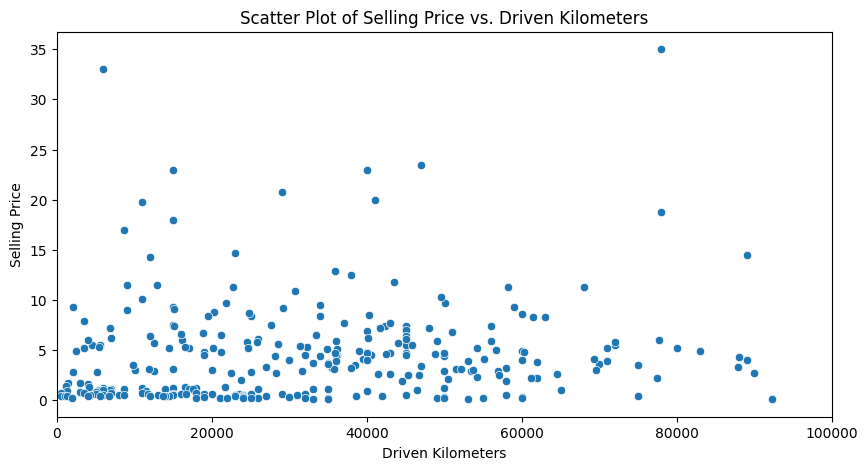

In [26]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=car_dataset, x='Driven_kms', y='Selling_Price')
# Setting x axis limit as certain outliers make the plot look crammed up
plt.xlim(0, 100000)

# Set labels for the x and y axes
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')

# Add a title to the plot
plt.title('Scatter Plot of Selling Price vs. Driven Kilometers')

# Display the plot
plt.show()

From the above Scatterplot, we can see that as the number of Driven Kilometers increases, the Selling Price of the car tends to decrease.

## 5. Heatmap for seeing to correlation between the numerical features

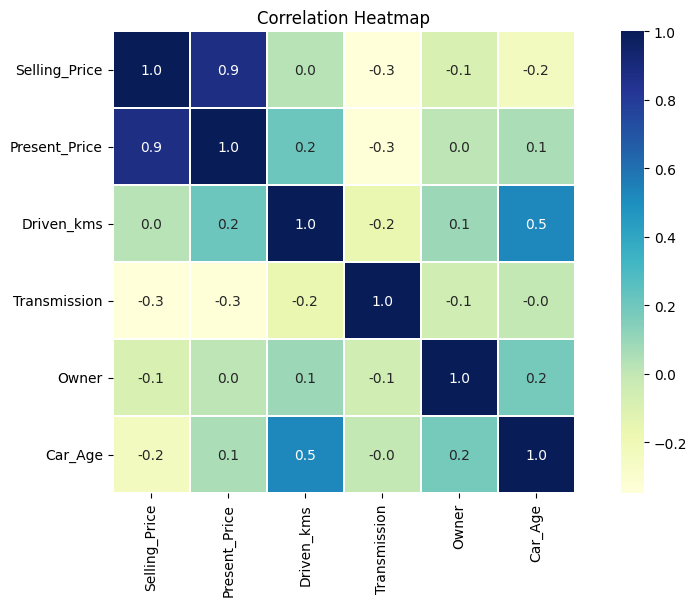

In [27]:
plt.figure(figsize=(12, 6))

exclude = ['Fuel_Type_Diesel','Fuel_Type_Petrol','Selling_type_Individual']
df_corr = df.drop(columns = exclude)

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, linewidths=0.1, fmt='.1f', square=True, cmap='YlGnBu')

plt.title("Correlation Heatmap")
plt.show()

From the above correlation heatmap we get to know that, Present price and selling price are positively highly correlated, as 'Present_Price' is likely one of the significant factors that influence the 'Selling_Price' of a car.

## Data-preprocessing

## Plotting histogram of selling price to see the distribution

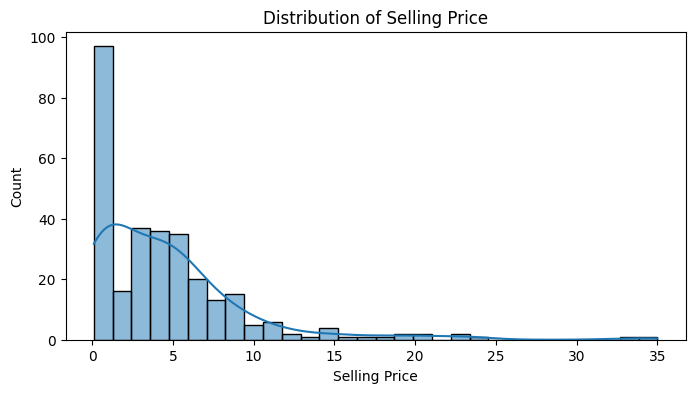

In [28]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Selling_Price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()

As we can see the data has many outliers and does not have a proper distribution

## Handling Outliers in the Selling Price

In [29]:
# Removing outliers by Using IQR method:
q1, q3, median = df.Selling_Price.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Selling_Price'] = np.where(df['Selling_Price'] > upper_limit, median,np.where(df['Selling_Price'] < lower_limit,median,df['Selling_Price']))

# Removing outliers by Capping:
for i in ['Present_Price','Driven_kms','Owner','Car_Age']:
  upper_limit = df[i].quantile(0.99)
  df[i] = np.where(df[i] > upper_limit, upper_limit, df[i])


Here we used IQR method and Capping method, Based on IQR method i set Upper limit and Lower limit of Selling Price and convert those outliers into median values.

Basically the top 1% we are considering outliers and capping them to the 99th percentile

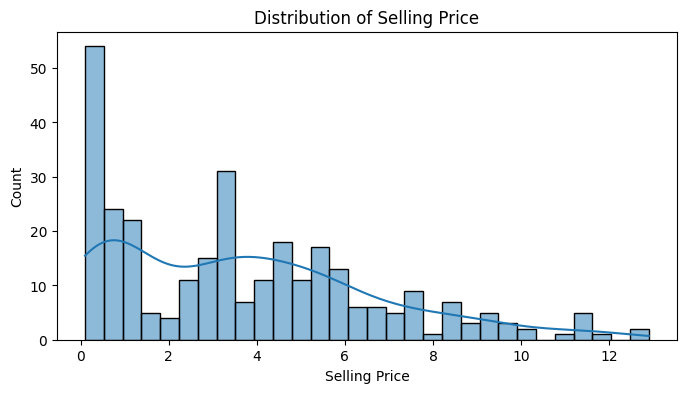

In [30]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Selling_Price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()

In [31]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
continuous_variables = ['Present_Price', 'Driven_kms', 'Car_Age']

In [33]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [34]:
continuous_feature_df

,Present_Price,Driven_kms,Car_Age
0,5.59,27000.0,11.0
1,9.54,43000.0,12.0
2,9.85,6900.0,8.0
3,4.15,5200.0,14.0
4,6.87,42450.0,11.0
...,...,...,...
296,11.60,33988.0,9.0
297,5.90,60000.0,10.0
298,11.00,87934.0,16.0
299,12.50,9000.0,8.0


In [35]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,Present_Price,2.184827
1,Driven_kms,4.481965
2,Car_Age,4.211988


We do not need to remove any column as the VIF is not too high so we could keeps these columns

# Checking if the selling price data is skewed or normal distribution

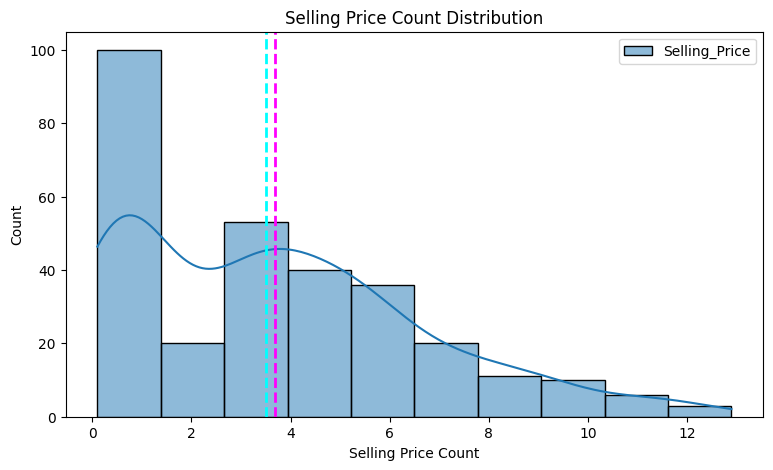

In [36]:
# Transform the data
# Visualizing the distribution of the dependent variable - Selling Price
dependent_variable = ['Selling_Price']

plt.figure(figsize=(9,5))
sns.histplot(df[dependent_variable],kde=True)
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [37]:
# Skew of the dependent variable
df[dependent_variable].skew()

,0
Selling_Price,0.771204


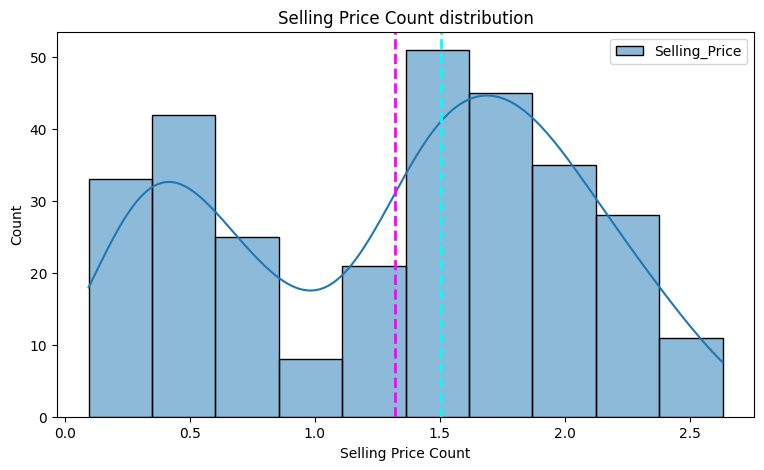

In [38]:
# Visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(9,5))
sns.histplot(np.log1p(df[dependent_variable]),kde=True)
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count distribution')
plt.axvline(np.log1p(df['Selling_Price']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df['Selling_Price']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

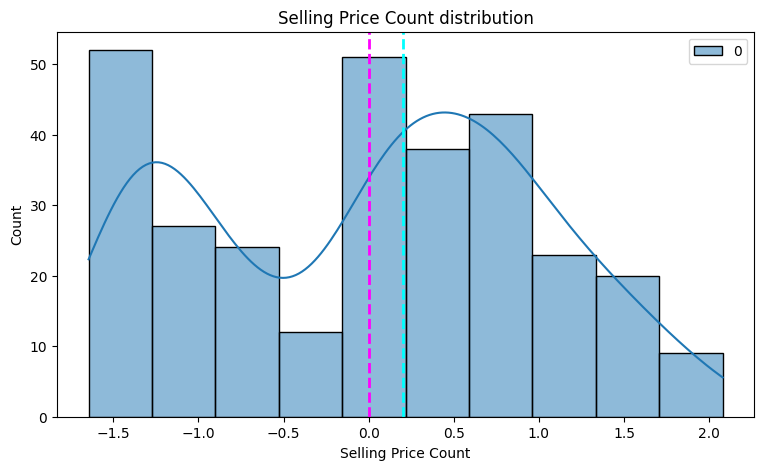

In [39]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer('yeo-johnson')

# Visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(9,5))
sns.histplot(pt.fit_transform(df[dependent_variable]),kde=True)
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count distribution')
plt.axvline(pt.fit_transform(df[dependent_variable]).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.median(pt.fit_transform(df[dependent_variable])), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [40]:
from scipy.stats import skew
print("Skew after Power Transformer:", skew(pt.fit_transform(df[['Selling_Price']])))

Skew after Power Transformer: [-0.052381]


# We will use Power Transformer instead of log transformation as that is giving the better distribution

In [41]:
# Defining dependent and independent variables
X = df.drop('Selling_Price',axis=1)
y = pt.fit_transform(df[dependent_variable])

In [42]:
y= pd.DataFrame(y)
y.columns = ['Selling_Price']
y

,Selling_Price
0,0.150365
1,0.575618
2,1.160376
3,-0.028751
4,0.534358
...,...
294,1.573962
295,0.359792
296,0.150365
297,1.885002


In [43]:
print("Features of the training dataset")
X.columns.tolist()

Features of the training dataset


['Present_Price',
 'Driven_kms',
 'Transmission',
 'Owner',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Individual',
 'Car_Age']

# We will be Scaling the data now

In [60]:
features = [i for i in df.columns if i not in ['Selling_Price']]

scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Splitting Data into train and test splits

In [45]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
Selling_Price,
0.204154,14
-1.321048,7
-1.201373,6
0.707136,6
0.575618,5
...,...
1.796202,1
1.885002,1
1.920985,1


# ML Model Evaluation Function



In [62]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 5 important features, and returns a list of the model scores'''

  # Apply inverse power transformation to y_test and y_pred as we have used power transformation
  y_t = pt.inverse_transform(pd.DataFrame(y_test.values.reshape(-1, 1), columns=['Selling_Price']))
  y_p = pt.inverse_transform(pd.DataFrame(y_pred.reshape(-1, 1), columns=['Selling_Price']))
  y_train2 = pt.inverse_transform(pd.DataFrame(y_train.values.reshape(-1, 1), columns=['Selling_Price']))
  y_train_pred = pt.inverse_transform(pd.DataFrame(model.predict(X_train).reshape(-1, 1), columns=['Selling_Price']))


  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Selling Price', fontsize=12)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Chart for Feature importances
  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(7,4))
  plt.title('Feature Importances (top 5) for '+str(model), fontsize = 12)
  plt.xlabel('Relative Importance')
  feat.nlargest(5).plot(kind='barh')


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

# ML Model - 1 : Linear Regression

In [63]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

MSE : 3.908347528369451
RMSE : 1.9769541037589746
MAE : 1.2827618940862158
Train R2 : 0.6596406704185079
Test R2 : 0.5939580747469382
Adjusted R2 :  0.5538551685491049


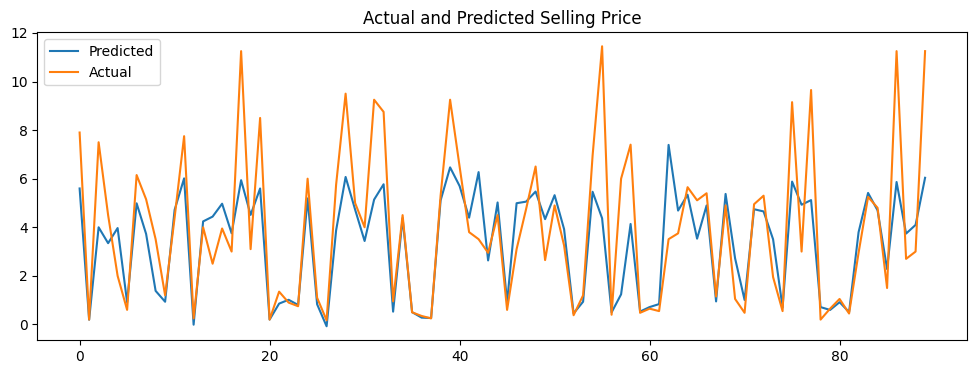

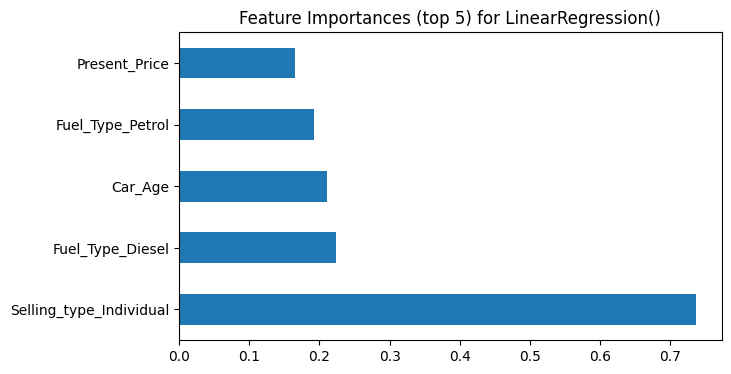

In [66]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])
score['Linear regression'] = linear_score

In [67]:
score

,Linear regression
MSE,3.908348
RMSE,1.976954
MAE,1.282762
Train R2,0.659641
Test R2,0.593958
Adjusted R2,0.553855


## Now We will Cross- Validation & Hyperparameter Tune the Linear Regressor Model

In [69]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [70]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.7476473532767276


In [71]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [72]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 3.908347528369451
RMSE : 1.9769541037589746
MAE : 1.2827618940862158
Train R2 : 0.6596406704185079
Test R2 : 0.5939580747469382
Adjusted R2 :  0.5538551685491049


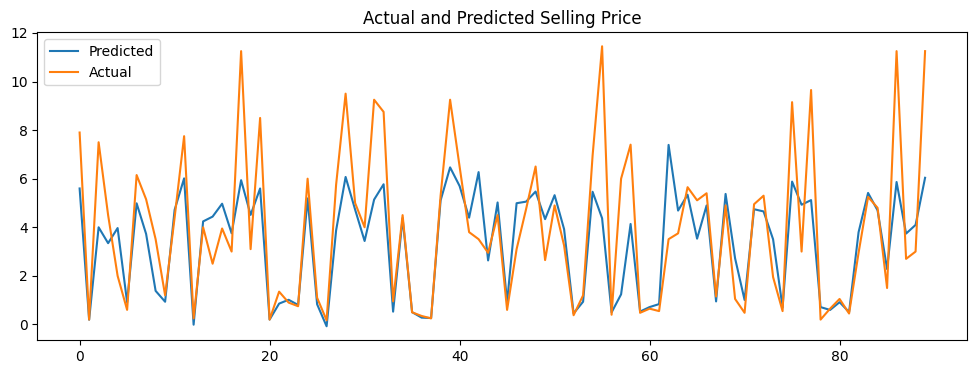

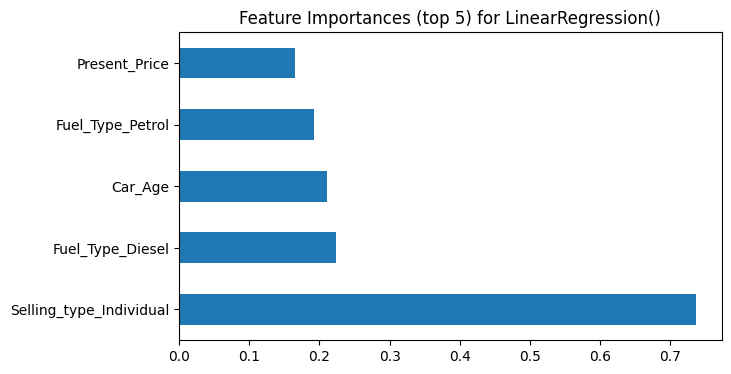

In [73]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [74]:
# Updated Evaluation Metric Score chart
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,3.908348,3.908348
RMSE,1.976954,1.976954
MAE,1.282762,1.282762
Train R2,0.659641,0.659641
Test R2,0.593958,0.593958
Adjusted R2,0.553855,0.553855


There is not much to tune in basic Linear Regressor that's why its probe to overfitting in the dataset

# ML Model - 2 : Lasso Regression

In [75]:
# Import the Lasso Regression class
lasso = Lasso()

# Fit the lasso regression model to the training data
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)

MSE : 10.82200843303672
RMSE : 3.2896821173233013
MAE : 2.5958208378137715
Train R2 : -0.06501787020180227
Test R2 : -0.1243087026829317
Adjusted R2 :  -0.23535153751581395


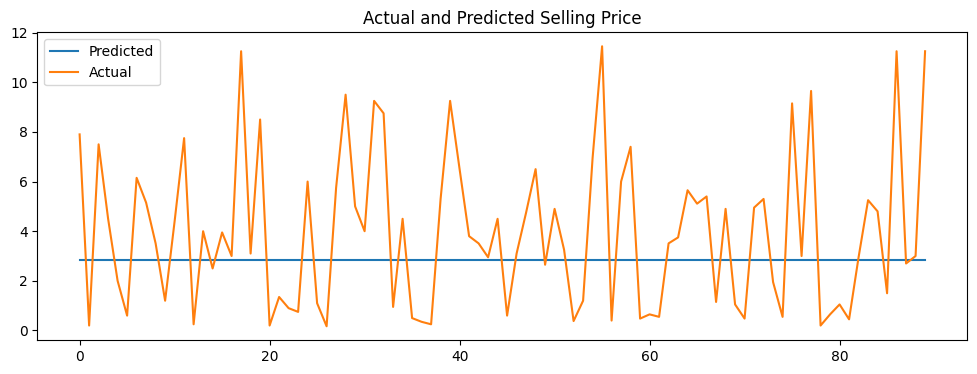

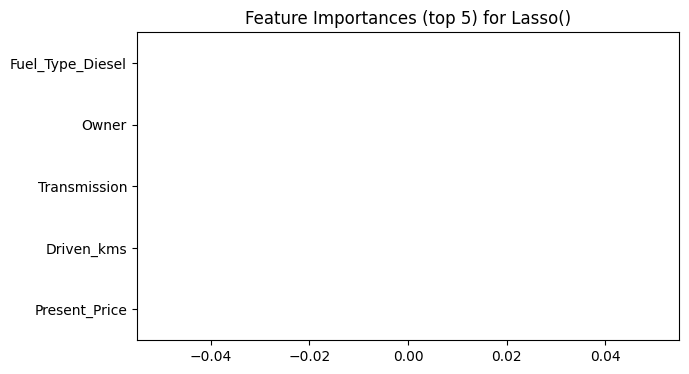

In [76]:
# Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [77]:
score

,Linear regression,Linear regression tuned,Lasso regression
MSE,3.908348,3.908348,10.822008
RMSE,1.976954,1.976954,3.289682
MAE,1.282762,1.282762,2.595821
Train R2,0.659641,0.659641,-0.065018
Test R2,0.593958,0.593958,-0.124309
Adjusted R2,0.553855,0.553855,-0.235352


## Now we will do its Cross - Validation & Hyperparameter Tuning

In [79]:
# Define the model
lasso = Lasso()

# Define the parameters in this parameter grid
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting the ml model
lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.422e-02, tolerance: 1.588e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.375e-01, tolerance: 1.698e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.190e-02, tolerance: 1.560e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [82]:
# Getting optimum parameters
print("The optimum alpha value is :" ,lasso_regressor.best_params_)
print("Using ",lasso_regressor.best_params_, " the negative MSE is: ", lasso_regressor.best_score_)

The optimum alpha value is : {'alpha': 0.01}
Using  {'alpha': 0.01}  the negative MSE is:  -0.22680121830867658


In [83]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict the model
y_pred_lassocv = lasso.predict(X_test)

MSE : 4.001082031633515
RMSE : 2.0002704896172205
MAE : 1.3020283018278425
Train R2 : 0.6517972129828645
Test R2 : 0.5843237993992605
Adjusted R2 :  0.5432693598337553


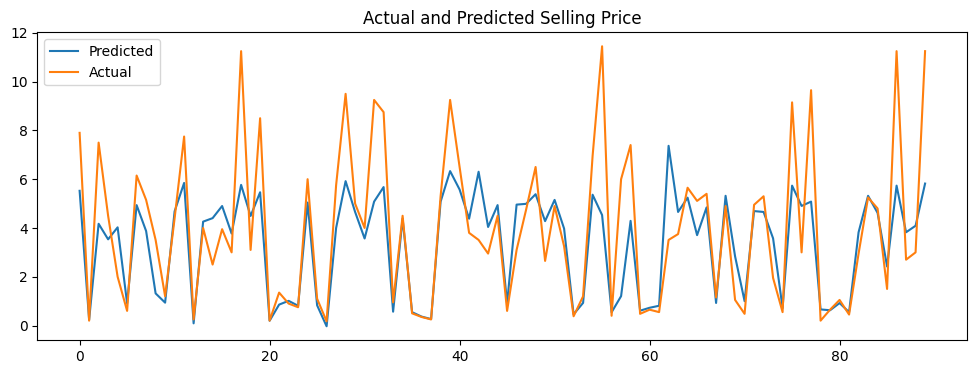

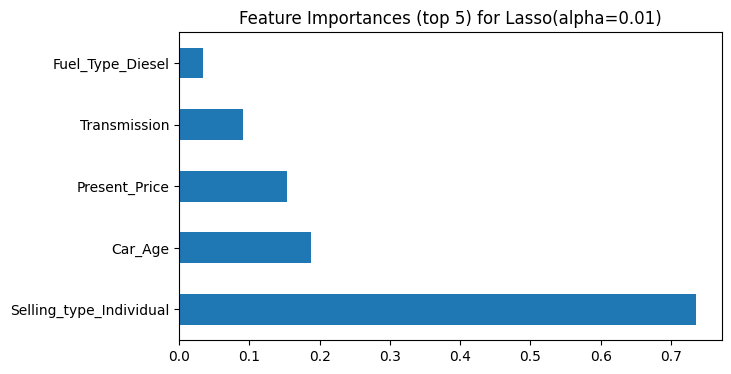

In [92]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

score['Lasso tuned'] = lasso2

In [94]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso tuned
MSE,3.908348,3.908348,10.822008,4.001082
RMSE,1.976954,1.976954,3.289682,2.000270
MAE,1.282762,1.282762,2.595821,1.302028
Train R2,0.659641,0.659641,-0.065018,0.651797
Test R2,0.593958,0.593958,-0.124309,0.584324
Adjusted R2,0.553855,0.553855,-0.235352,0.543269


# ML Model - 3 : Random Forest

In [101]:
# Import Random Forest Regressor class
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

y_pred_rf1 = rf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE : 1.3857380156011216
RMSE : 1.1771737406182325
MAE : 0.6177702726813876
Train R2 : 0.9863611162012604
Test R2 : 0.8560343655043952
Adjusted R2 :  0.8418155374060639


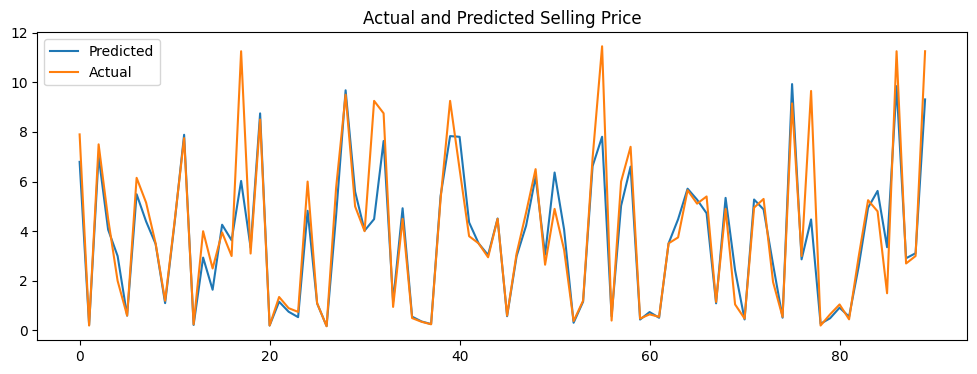

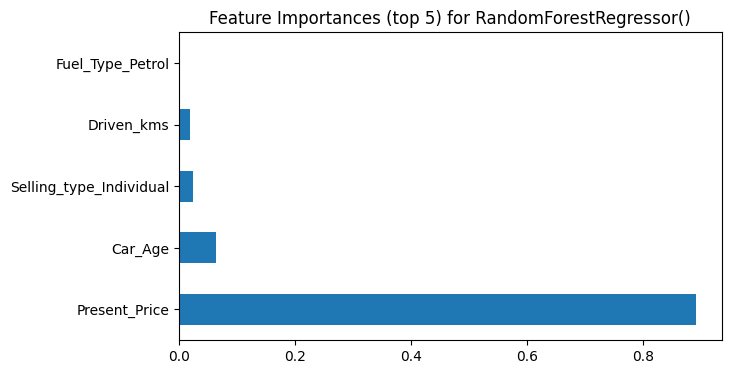

In [102]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [103]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso tuned,Random forest
MSE,3.908348,3.908348,10.822008,4.001082,1.385738
RMSE,1.976954,1.976954,3.289682,2.000270,1.177174
MAE,1.282762,1.282762,2.595821,1.302028,0.617770
Train R2,0.659641,0.659641,-0.065018,0.651797,0.986361
Test R2,0.593958,0.593958,-0.124309,0.584324,0.856034
Adjusted R2,0.553855,0.553855,-0.235352,0.543269,0.841816


## Cross - Validation & Hyperparameter Tuning

In [105]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300,400], 'min_samples_leaf':[15,16,20,21,25]}

In [109]:
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=5,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train.values.ravel())
rf_best_params = rf_gridsearch.best_params_
rf_best_params

{'min_samples_leaf': 15, 'n_estimators': 300}

In [112]:
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],min_samples_leaf=rf_best_params['min_samples_leaf'])
rf_model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(min_samples_leaf=15, n_estimators=300)

In [113]:
y_pred_rf = rf_model.predict(X_test)

MSE : 2.693173463070657
RMSE : 1.6410891088148314
MAE : 1.0100390287556307
Train R2 : 0.8219024121530409
Test R2 : 0.7202036589510026
Adjusted R2 :  0.6925694524276448


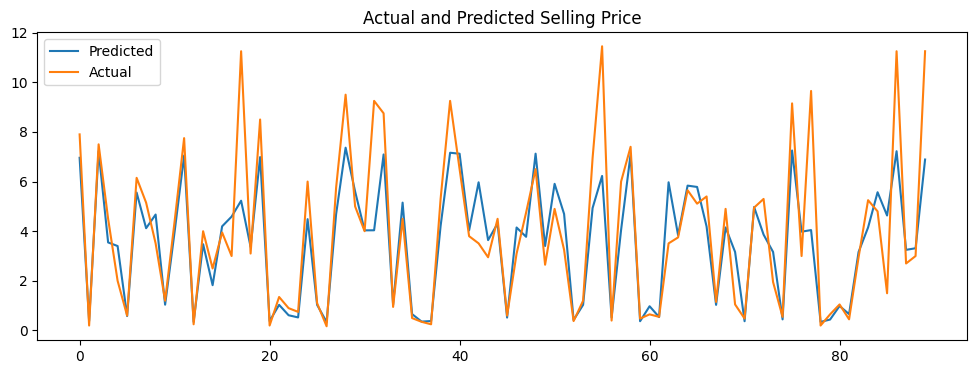

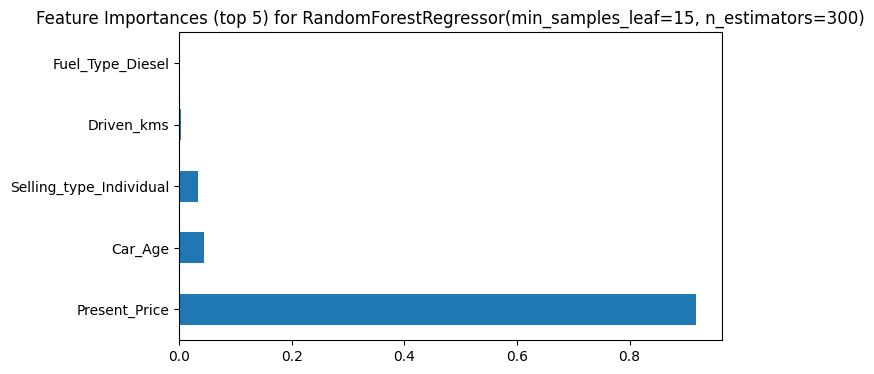

In [114]:
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

# ML Model - 4 : Gradient Boosting Regressor

In [115]:
gb = GradientBoostingRegressor()

# Fit the Gradient Boosting model to the training data
gb.fit(X_train,y_train)

# Predict on the model
y_pred_gb1 = gb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MSE : 1.465797855824567
RMSE : 1.210701390031649
MAE : 0.5875400580762445
Train R2 : 0.9874341491992679
Test R2 : 0.8477168729007263
Adjusted R2 :  0.8326765640514153


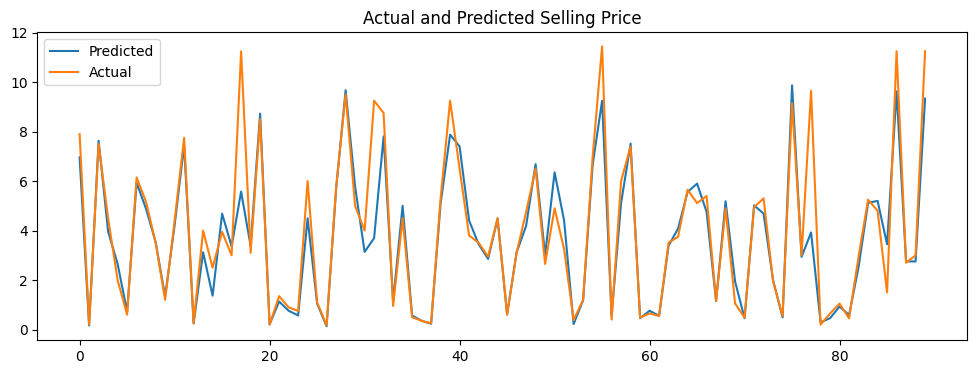

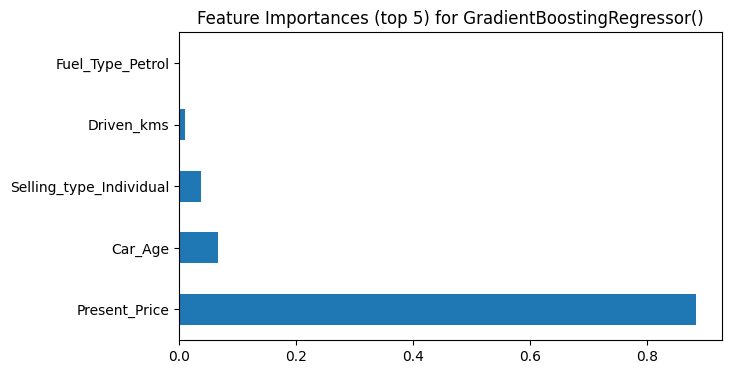

In [116]:
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

In [117]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso tuned,Random forest,Random forest tuned,Gradient Boosting Regressor
MSE,3.908348,3.908348,10.822008,4.001082,1.385738,2.693173,1.465798
RMSE,1.976954,1.976954,3.289682,2.000270,1.177174,1.641089,1.210701
MAE,1.282762,1.282762,2.595821,1.302028,0.617770,1.010039,0.587540
Train R2,0.659641,0.659641,-0.065018,0.651797,0.986361,0.821902,0.987434
Test R2,0.593958,0.593958,-0.124309,0.584324,0.856034,0.720204,0.847717
Adjusted R2,0.553855,0.553855,-0.235352,0.543269,0.841816,0.692569,0.832677


## Cross - Validation & Hyperparameter Tuning

In [118]:
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],'min_samples_leaf':np.arange(20,24),'max_depth':[14,15,16,17,18,19,20]}

In [120]:
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_
gb_best_params

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


{'n_estimators': 300, 'min_samples_leaf': np.int64(20), 'max_depth': 16}

In [121]:
gb_model = GradientBoostingRegressor(n_estimators=300,min_samples_leaf=20,max_depth = 16)

In [122]:
# Fitting model
gb_model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(max_depth=16, min_samples_leaf=20, n_estimators=300)

In [123]:
# Predict on the Model
y_pred_gb = gb_model.predict(X_test)

MSE : 1.9422231880240475
RMSE : 1.3936366771953326
MAE : 0.6951116179389947
Train R2 : 0.9807878176938893
Test R2 : 0.7982205940459356
Adjusted R2 :  0.7782917638282503


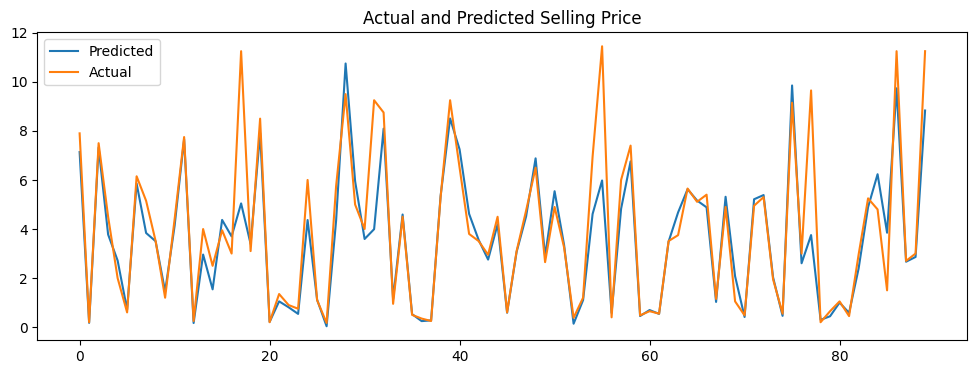

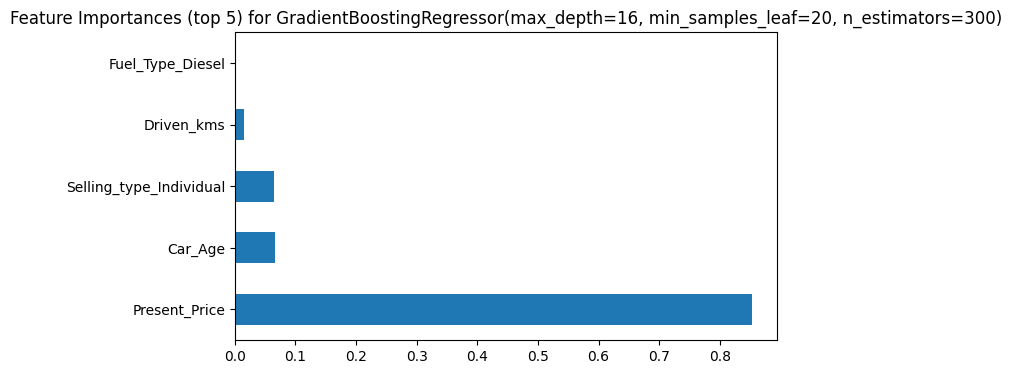

In [124]:
# Evaluation matrices for GradientBoosting
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result

In [125]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned
MSE,3.908348,3.908348,10.822008,4.001082,1.385738,2.693173,1.465798,1.942223
RMSE,1.976954,1.976954,3.289682,2.000270,1.177174,1.641089,1.210701,1.393637
MAE,1.282762,1.282762,2.595821,1.302028,0.617770,1.010039,0.587540,0.695112
Train R2,0.659641,0.659641,-0.065018,0.651797,0.986361,0.821902,0.987434,0.980788
Test R2,0.593958,0.593958,-0.124309,0.584324,0.856034,0.720204,0.847717,0.798221
Adjusted R2,0.553855,0.553855,-0.235352,0.543269,0.841816,0.692569,0.832677,0.778292


# Comparing R2 Scores of each model

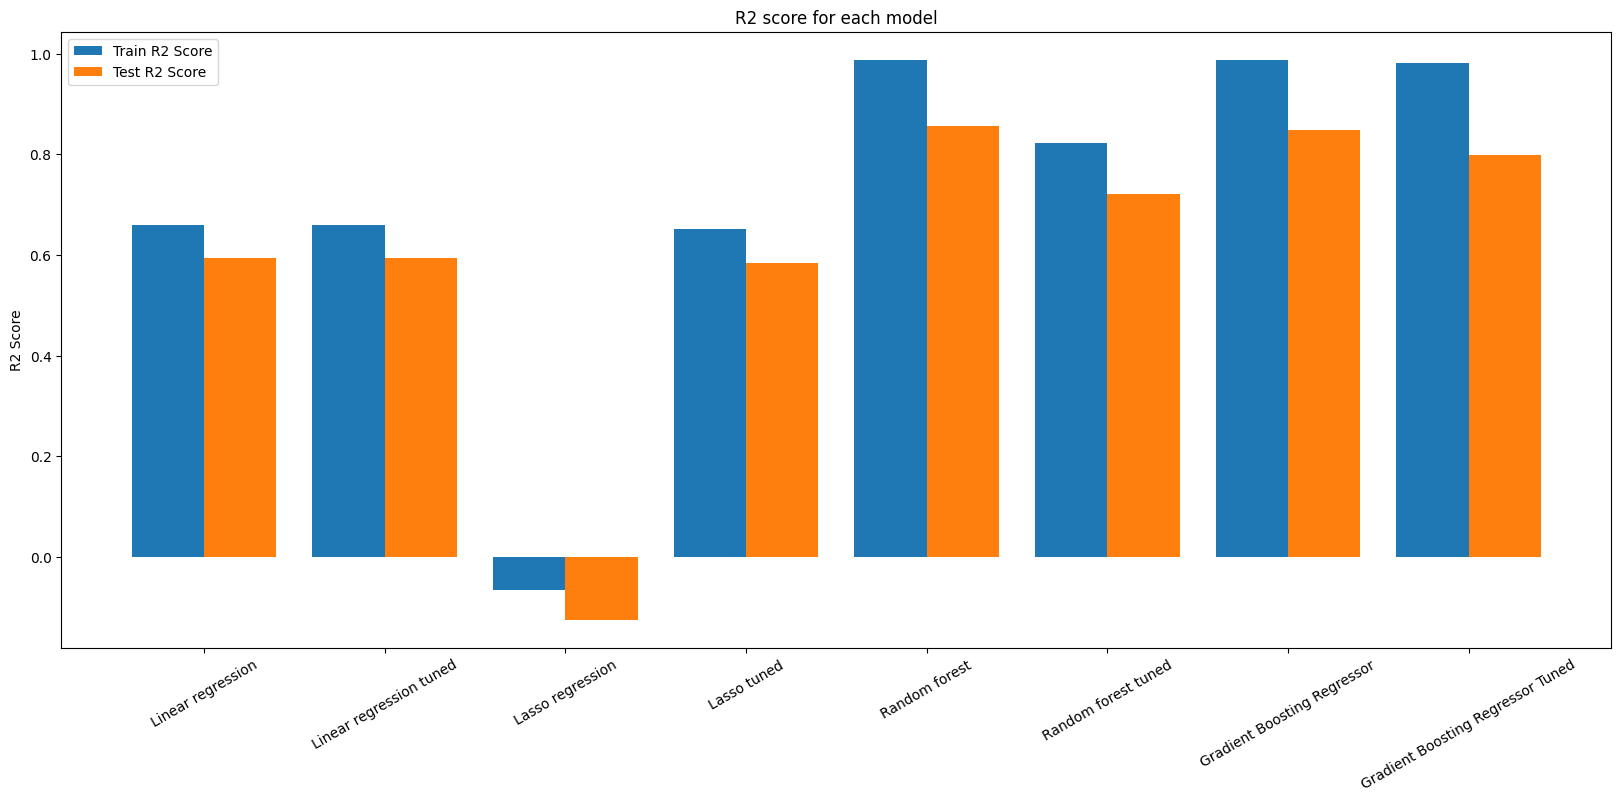

In [130]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
# Using matloplib to plot the R2 Scores
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

# Which Model is the best to use

After trying several models like linear regression, ridge regression, decision tree, random forest and gradient boosting but amongst them i have selected random forest model as i achieved 98% training accuracy and 93% testing accuracy. So looking at the overall R2 scores its for sure the best one to pick for the job.

# Conclusion

This project delves into the complexities of the automotive market to build a reliable car price prediction model using machine learning. By studying diverse variables such as fuel type, seller category, transmission, and ownership history, we aim to understand what drives car pricing and develop a model that can accurately forecast it.

Key Findings and Insights
- Top Models: Among all models, City emerged as the most frequently listed car, followed by Corolla Altis, Verna, Fortuner, and Brio, indicating their strong market presence.

- Most Popular Purchase Years: The majority of the vehicles in the dataset were purchased in 2015, making it the most active year for car buying. It is closely followed by 2016 and 2014.

- Fuel Preferences: A significant number of vehicles run on petrol, with diesel and CNG following behind. This suggests that petrol remains the most favored fuel type among buyers.

- Sales Channels: Most transactions were carried out through dealers, highlighting their major role in the car resale ecosystem.

- Transmission Trends: The data revealed a clear preference for manual transmission vehicles over automatic ones, which may reflect both consumer habits and availability.

- Ownership Effect on Price: Cars that had only one previous owner generally fetched higher prices. On the other hand, cars with multiple previous owners—like second or third—tended to sell for less.

- Fuel Type vs. Price: Diesel cars usually commanded higher prices than petrol and CNG cars, indicating how fuel type plays a significant role in pricing.

This project has not only offered practical insights into car pricing dynamics but also served as an excellent platform to apply and strengthen data science skills. From understanding feature importance to building a high-performing predictive model, we explored both the business and technical sides of the problem.